# The Sparks Fundation - Data Science and Business Analytics

# TASK 1 : Prediction using Supervised ML

## Aim: To Predict the percentage of marks of the students based on the number of hours they studied

### Author: Yadav Shivangi

In [1]:
# here, we import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
# Reading the data 
data = pd.read_csv('http://bit.ly/w-data')
data.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [4]:
# data preprocessing 
data.isnull == True

False

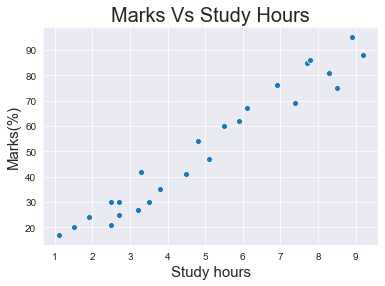

In [7]:
#data visualization
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks(%)', size=15)
plt.xlabel('Study hours', size=15)
plt.show()

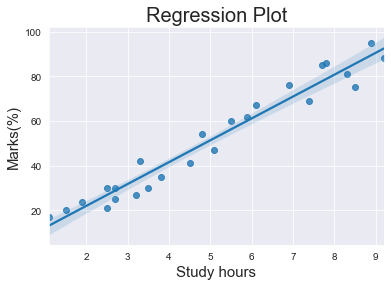

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [9]:
#plot a regression line to confirm the correlation
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks(%)', size=15)
plt.xlabel('Study hours', size=15)
plt.show()
print(data.corr())

### We can see that the variables are positively correlated.

# step 1: Train the model

In [10]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [11]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


In [12]:
#predicting the marks
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [13]:
# compare marks with actul marks
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


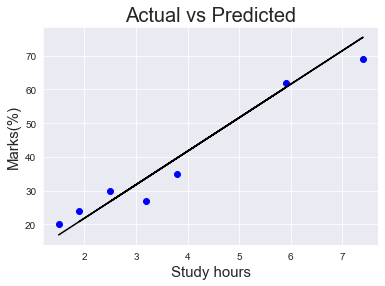

In [14]:
# visualize that
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks(%)', size=15)
plt.xlabel('Study hours', size=15)
plt.show()

# Step 2: Evaluate The model

In [15]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))


Mean absolute error:  4.130879918502486


### Here, the chances of error or wrong forecasting through the model are very less.

# Example:predicte the score of student who daily study 8 hours

In [16]:
hours = [8]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 81.466


### The score of student who daily study 8 hours predicted 81.46%.